In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 33.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf  
from fbprophet import Prophet

In [4]:
data = yf.download('TWTR','2010-01-01','2021-11-30')

[*********************100%***********************]  1 of 1 completed


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-22,48.509998,48.549999,46.520000,47.310001,47.310001,26620100
2021-11-23,47.200001,47.459999,45.980000,47.139999,47.139999,19663700
2021-11-24,46.660000,47.639999,46.160000,47.520000,47.520000,9979500
2021-11-26,46.639999,47.349998,46.230000,47.070000,47.070000,7861300
2021-11-29,51.880001,52.270000,45.619999,45.779999,45.779999,71686600


In [6]:
data.reset_index(inplace=True)

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [9]:
df = data[["Date","Adj Close"]] 
df = df.rename(columns = {"Date":"ds","Adj Close":"y"}) 
df.head()

,ds,y
0,2013-11-07,44.900002
1,2013-11-08,41.650002
2,2013-11-11,42.900002
3,2013-11-12,41.900002
4,2013-11-13,42.599998


In [15]:
prop = Prophet(daily_seasonality = True) 
prop.fit(df) 

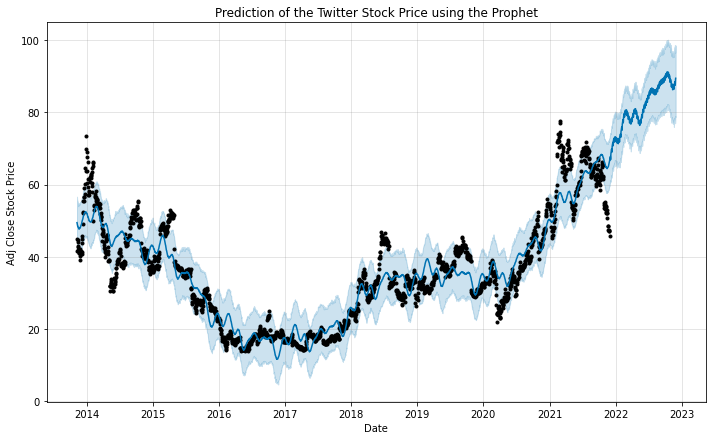

In [16]:
future = prop.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = prop.predict(future)
prop.plot(prediction)
plt.title("Prediction of the Twitter Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Adj Close Stock Price")
plt.show()

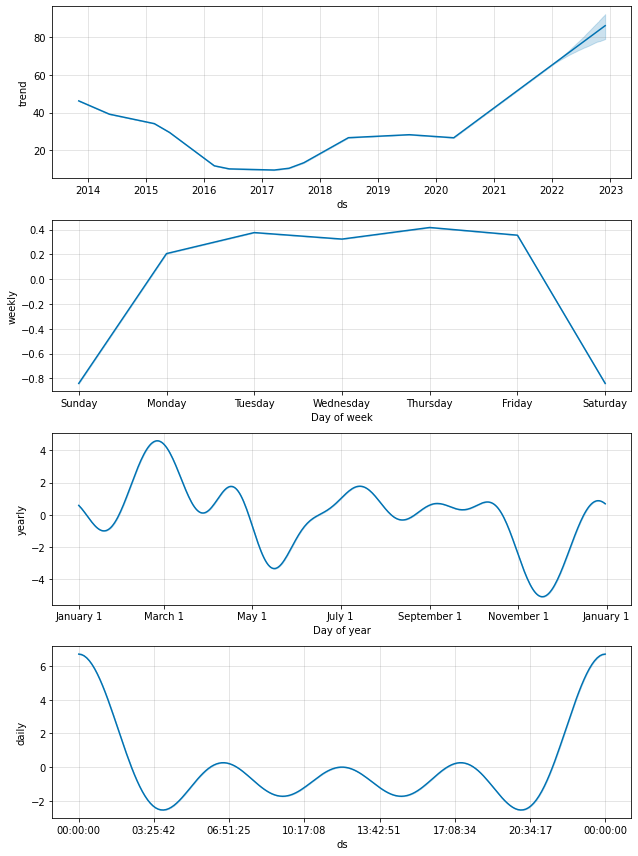

In [17]:
prop.plot_components(prediction)
plt.show()